In [81]:
import pandas
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
# import in our data
df = pandas.read_csv("Spotify2023.csv",  encoding='latin-1')
# filter out any non-numeric values and drop them as a row
df = df[df["streams"].apply(lambda x: x.isnumeric())]
print(df)
# make streams column an int
df["streams"] = df["streams"].astype(int)

                              track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_pl

In [83]:
# how to create released date

meanValences = df

# group released year and month into one column
meanValences['released_year'] = meanValences['released_year'].astype(str)
meanValences['released_month'] = meanValences['released_month'].astype(str)
meanValences['released_day'] = meanValences['released_day'].astype(str)
meanValences['released_date'] = meanValences['released_year'] + '.' + meanValences['released_month'] + '.' + meanValences['released_day']

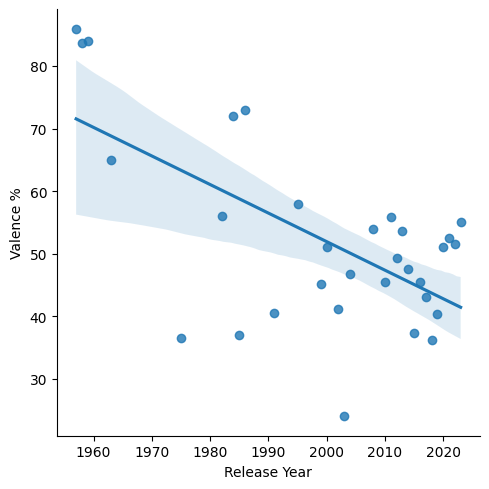

In [84]:
# group song by released_year and released_month and get the mean of valence
#meanValences = df.groupby('released_year')['valence_%'].mean().reset_index()

# group song by released year but remove any years that have less than 2 songs
meanValences = df.groupby('released_year').filter(lambda x: len(x) >= 2)
#get the mean of the valence for each year
meanValences = meanValences.groupby('released_year')['valence_%'].mean().reset_index()


meanValences['released_year'] = meanValences['released_year'].astype(int)

#create a scatterlot between release year and valence
plot = sns.lmplot(data=meanValences, x="released_year", y="valence_%")

#print the linear regression from the lmplot
plot.set(xlabel='Release Year', ylabel='Valence %')

In [85]:
#get the correlation coeffiecient between release year and valence
corr = np.corrcoef(meanValences['released_year'], meanValences['valence_%'])[0, 1]
print("R^2 Value: " + str(corr**2))

R^2 Value: 0.39251339942693897


27
27
27


<Axes: xlabel='released_year'>

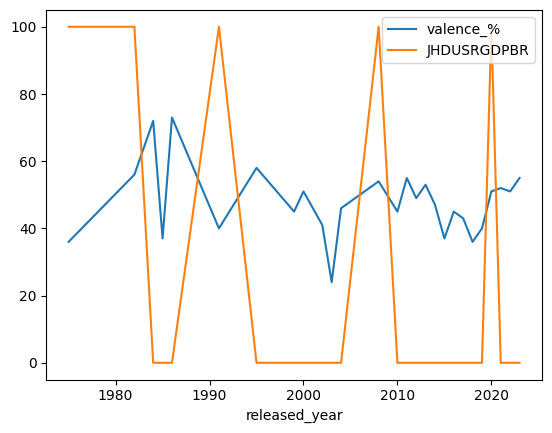

In [86]:
recession = pandas.read_csv("recession.csv",  encoding='latin-1')
recession["DATE"] = recession["DATE"].map(lambda x: x[0:4])
recession.drop_duplicates(subset ="DATE", keep = "first", inplace = True)
#recession['DATE'] = recession['DATE'].astype(float)
#print(recession)

#merge the recession data with the meanValences data
recession = recession.rename(columns={"DATE": "released_year"})
recession = recession.astype(int)
recession['JHDUSRGDPBR'] = recession['JHDUSRGDPBR'].map(lambda x: 100 if x == 1 else 0)
meanValences = meanValences.astype(int)
merged = pandas.merge(meanValences, recession, on='released_year', how='inner')

print(len(merged["JHDUSRGDPBR"]))
print(len(merged["valence_%"]))
print(len(merged["released_year"]))

merged.plot(x='released_year', y=['valence_%', 'JHDUSRGDPBR'], kind="line")


,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
artist_count,1.000000,0.085614,0.037117,-0.018493,-0.102184,-0.018916,-0.136463,-0.051487,-0.089336,-0.004022,-0.038680,0.206543,0.128712,0.137317,-0.101619,-0.050359,0.042681,0.119486
released_year,0.085614,1.000000,0.071055,0.169733,-0.397519,0.067564,-0.230803,-0.203799,-0.040950,0.094321,-0.007448,0.184904,-0.055354,0.097502,-0.129000,-0.015575,-0.006285,0.131884
released_month,0.037117,0.071055,1.000000,0.078391,-0.105308,-0.048594,-0.024938,-0.001054,-0.020618,-0.005948,-0.039962,-0.047893,-0.117267,-0.083378,0.053357,0.033742,-0.012492,0.038821
released_day,-0.018493,0.169733,0.078391,1.000000,-0.080191,0.020996,0.010598,0.025555,0.009586,0.072718,-0.030873,0.047613,0.044332,0.051022,-0.006938,0.019022,0.001436,-0.016911
in_spotify_playlists,-0.102184,-0.397519,-0.105308,-0.080191,1.000000,0.164182,0.789822,0.708258,0.271162,0.144227,-0.019739,-0.106885,-0.021585,0.033899,-0.064683,-0.028194,-0.046725,-0.089973
in_spotify_charts,-0.018916,0.067564,-0.048594,0.020996,0.164182,1.000000,0.245821,0.233057,0.551985,0.600101,0.034435,0.029475,0.036205,0.082124,-0.055513,-0.010270,-0.047619,-0.082267
streams,-0.136463,-0.230803,-0.024938,0.010598,0.789822,0.245821,1.000000,0.772063,0.320234,0.228598,-0.002438,-0.105457,-0.040831,-0.026051,-0.004485,-0.044902,-0.048337,-0.112333
in_apple_playlists,-0.051487,-0.203799,-0.001054,0.025555,0.708258,0.233057,0.772063,1.000000,0.414184,0.368862,0.023450,-0.025945,0.057749,0.052807,-0.062299,-0.057349,-0.049662,-0.108515
in_apple_charts,-0.089336,-0.040950,-0.020618,0.009586,0.271162,0.551985,0.320234,0.414184,1.000000,0.383443,0.030500,-0.026260,0.048868,0.105199,-0.077692,-0.013356,-0.018839,-0.152440
in_deezer_charts,-0.004022,0.094321,-0.005948,0.072718,0.144227,0.600101,0.228598,0.368862,0.383443,1.000000,0.027834,0.070510,0.076711,0.094773,-0.029732,0.005312,-0.007610,-0.080920


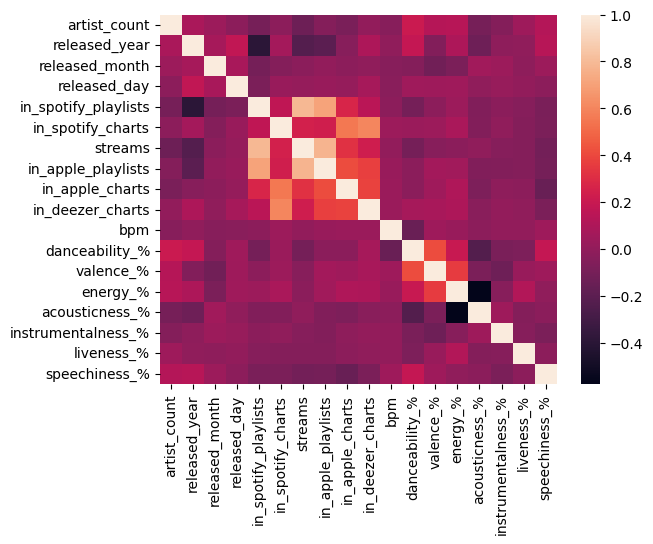

In [94]:
# create a correlation matrix for df
temp = df
temp['released_year'] = temp['released_year'].astype(int)
temp['released_month'] = temp['released_month'].astype(int)
temp['released_day'] = temp['released_day'].astype(int)
onlyNumerical = df.select_dtypes(include=[np.number])
corrMatrix = onlyNumerical.corr()

sns.heatmap(corrMatrix)

corrMatrix

# try again with GDP Dataset

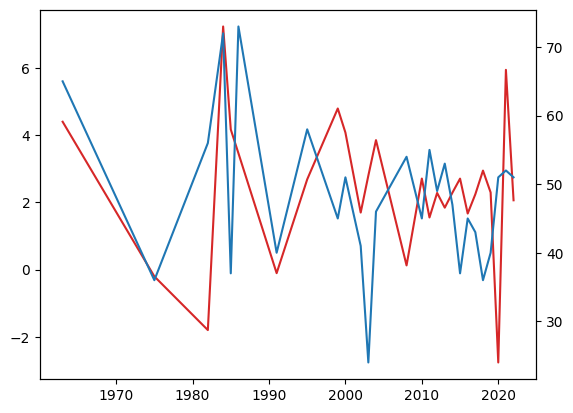

In [88]:
gdp = pandas.read_csv("united-states-gdp-growth-rate.csv",  encoding='latin-1')
gdp["date"] = gdp["date"].map(lambda x: x[0:4])
# delete the firs row because it has a NaN value
gdp = gdp.iloc[1:]

# merge the gdp data with the meanValences data
gdp = gdp.rename(columns={"date": "released_year"})
meanValences.astype(float)
gdp = gdp.astype(float)

#this scales the graph and makes it easier to see, but like idk if thats sus or not
#gdp[" GDP Growth (%)"] = gdp[" GDP Growth (%)"].map(lambda x: x*7)

merged = pandas.merge(meanValences, gdp, on='released_year', how='inner')
merged

fig, ax1 = plt.subplots()

ax1.plot(merged["released_year"], merged[" GDP Growth (%)"], color='tab:red')
ax2 = ax1.twinx()
ax2.plot(merged["released_year"], merged["valence_%"], color='tab:blue')

# plot the gdp growth rate and valence over time
#merged.plot(x='released_year', y=['valence_%', " GDP Growth (%)"], kind="line")

In [89]:
merged

,released_year,valence_%,GDP Growth (%),Annual Change
0,1963,65,4.4000,-1.70
1,1975,36,-0.2055,0.34
2,1982,56,-1.8029,-4.34
3,1984,72,7.2366,2.65
4,1985,37,4.1697,-3.07
5,1986,73,3.4626,-0.71
6,1991,40,-0.1083,-1.99
7,1995,58,2.6842,-1.34
8,1999,45,4.7945,0.31
9,2000,51,4.0772,-0.72


<Axes: xlabel=' GDP Growth (%)', ylabel='valence_%'>

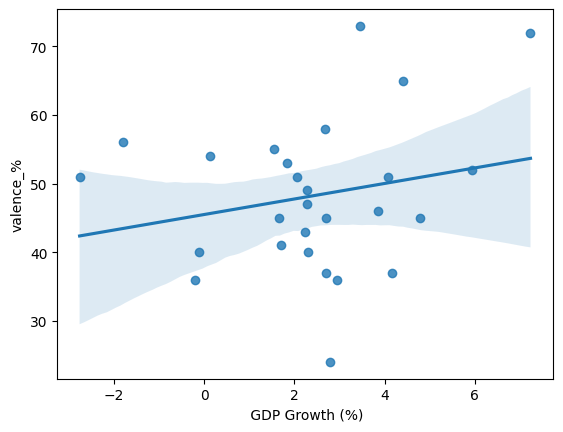

In [90]:
# make regplot of valence and GDP growth rate
sns.regplot(x=" GDP Growth (%)", y="valence_%", data=merged)

In [91]:
# correlation coefficient between valence and GDP growth rate
corr = np.corrcoef(merged[" GDP Growth (%)"], merged["valence_%"])[0, 1]
print("R^2 Value: " + str(corr**2))

R^2 Value: 0.04899950609805303


### What Correlation we lookin at?
#### subheader (optional)